In [14]:
using Revise
using PrevisibilityCrawler
using StatsBase, XGBoost
pc = PrevisibilityCrawler;
Base.displaysize() = (30, 800)

In [65]:
boostcrawlerparam = ["max_depth"=>2, "eta"=>.7, "subsample"=>0.7, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:params => boostcrawlerparam, :nr_round =>10));
pipe = Pipeline(model, rmae)
@time crossvalidation!(pipe, x, y, k=5)

  0.476844 seconds (6.12 k allocations: 17.460 MiB, 0.95% gc time)


(0.8707730903448473, 1.1520154835141556)

 25.060589 seconds (4.35 M allocations: 14.698 GiB, 9.75% gc time)


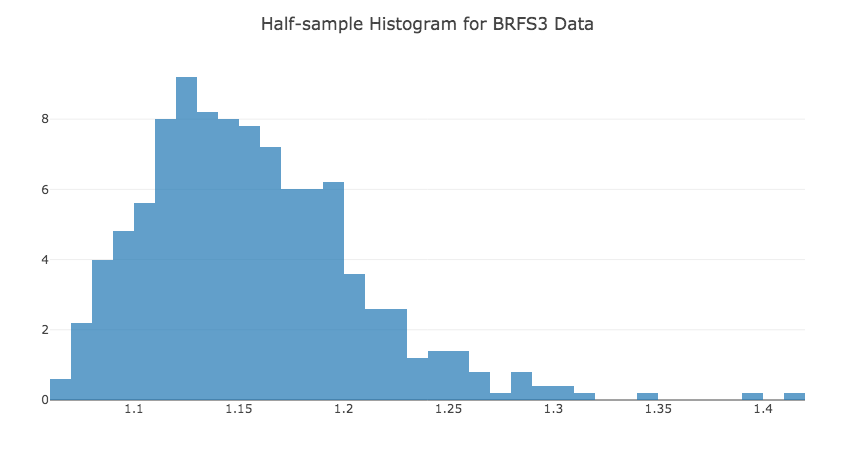

In [44]:
@time halfsample(x, y, model, paper)

In [5]:
modelcallback(x, y) = boostgrid(x, y, nr_rounds=10)
crawlpapers("boostpso", modelcallback, "pso", papers=papers[15:20])

Progress: 100%|█████████████████████████████████████████| Time: 0:06:44
Progress: 100%|█████████████████████████████████████████| Time: 0:04:48
Progress: 100%|█████████████████████████████████████████| Time: 0:05:17
Progress: 100%|█████████████████████████████████████████| Time: 0:05:35
Progress: 100%|█████████████████████████████████████████| Time: 0:06:37
Progress: 100%|█████████████████████████████████████████| Time: 0:05:01


In [43]:
modelcallback(x, y) = rfgrid(x, y, ntrees=40)
rfbench = wholebench(modelcallback, signalname="boostpso", thresh=.99)

Computing...100%|███████████████████████████████████████| Time: 0:03:09


,Stock,SignalCoverage,WholeMAE,SelectedMAE,WholeCDC,SelectedCDC,WholeDataDirection,SelectedDirection,WholeNaiveMae,SelectedNaiveMae,WholeMASE,SelectedMASE
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BRFS3,0.436166,0.00359976,0.00383786,0.549649,0.533131,0.522339,0.518541,0.00357415,0.00378733,1.00717,1.01334
2,PETR4,0.678734,0.00353935,0.00351877,0.519208,0.521105,0.532621,0.532617,0.00334756,0.00325271,1.05729,1.0818
3,BBAS3,0.202276,0.00338802,0.0033487,0.514097,0.542839,0.514615,0.493606,0.00335398,0.00330611,1.01015,1.01288
4,BBDC4,0.74898,0.00312904,0.00307949,0.503869,0.522074,0.528071,0.513057,0.00309359,0.00304026,1.01146,1.0129
5,ITSA4,0.259319,0.00277864,0.00261047,0.56456,0.580729,0.556051,0.588021,0.00275518,0.00253107,1.00851,1.03137
6,VALE3,0.313451,0.00322194,0.00326526,0.513995,0.519723,0.51712,0.524057,0.00320186,0.00312091,1.00627,1.04625
7,ITUB4,0.562976,0.00277367,0.00281653,0.524347,0.523556,0.513194,0.519932,0.00275161,0.00276945,1.00802,1.017
8,ABEV3,0.454798,0.00302542,0.00301521,0.529342,0.519326,0.536479,0.531532,0.00294619,0.00285951,1.0269,1.05445
9,RENT3,0.647296,0.00408235,0.00421376,0.502751,0.515654,0.505301,0.495957,0.00405475,0.00396394,1.00681,1.06302


In [45]:
crawlertests(rfbench)

,MAE,CDC,MASE
,Float64,Float64,Float64
1,0.0490099,0.138247,0.994958


In [46]:
modelcallback(x, y) = lassobic(x, y)
lassobench = wholebench(modelcallback, signalname="boostpso", thresh=.99)

Computing...100%|███████████████████████████████████████| Time: 0:00:36


,Stock,SignalCoverage,WholeMAE,SelectedMAE,WholeCDC,SelectedCDC,WholeDataDirection,SelectedDirection,WholeNaiveMae,SelectedNaiveMae,WholeMASE,SelectedMASE
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BRFS3,0.436166,0.00360735,0.00381479,0.556145,0.555623,0.522339,0.518541,0.00357415,0.00378733,1.00929,1.00725
2,PETR4,0.678734,0.00336628,0.00328904,0.522203,0.521489,0.532621,0.532617,0.00334756,0.00325271,1.00559,1.01117
3,BBAS3,0.202276,0.00336785,0.00330456,0.516037,0.540281,0.514615,0.493606,0.00335398,0.00330611,1.00413,0.999531
4,BBDC4,0.74898,0.00314357,0.0030585,0.508513,0.525268,0.528071,0.513057,0.00309359,0.00304026,1.01616,1.006
5,ITSA4,0.259319,0.00277255,0.00261454,0.562939,0.558333,0.556051,0.588021,0.00275518,0.00253107,1.0063,1.03298
6,VALE3,0.313451,0.00320916,0.00314685,0.504348,0.514088,0.51712,0.524057,0.00320186,0.00312091,1.00228,1.00831
7,ITUB4,0.562976,0.00275273,0.00276708,0.517682,0.527422,0.513194,0.519932,0.00275161,0.00276945,1.00041,0.999142
8,ABEV3,0.454798,0.0029537,0.00287263,0.539783,0.531532,0.536479,0.531532,0.00294619,0.00285951,1.00255,1.00459
9,RENT3,0.647296,0.00406144,0.00409101,0.505301,0.535766,0.505301,0.495957,0.00405475,0.00396394,1.00165,1.03206


In [47]:
crawlertests(lassobench)

,MAE,CDC,MASE
,Float64,Float64,Float64
1,0.00430072,0.111129,0.914749


In [35]:
modelcallback(x, y) = boostgrid(x, y, nr_rounds=10)
boostbench = wholebench(modelcallback, signalname="boostpso", thresh=.95)

Computing...100%|███████████████████████████████████████| Time: 0:01:35


,Stock,SignalCoverage,WholeMAE,SelectedMAE,WholeCDC,SelectedCDC,WholeDataDirection,SelectedDirection,WholeNaiveMae,SelectedNaiveMae,WholeMASE,SelectedMASE
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BRFS3,0.571258,0.00394056,0.00419791,0.540634,0.540497,0.522339,0.518682,0.00357415,0.00377078,1.10252,1.11327
2,PETR4,0.748405,0.00383827,0.00437268,0.516213,0.525318,0.532621,0.531234,0.00334756,0.00325098,1.14659,1.34503
3,BBAS3,0.268236,0.00352088,0.00359728,0.513321,0.489392,0.514615,0.48891,0.00335398,0.00332538,1.04976,1.08177
4,BBDC4,0.815393,0.00331688,0.0031391,0.503729,0.520966,0.528071,0.51717,0.00309359,0.00303517,1.07218,1.03424
5,ITSA4,0.354673,0.00291035,0.0026812,0.545786,0.573877,0.556051,0.58949,0.00275518,0.00252243,1.05632,1.06294
6,VALE3,0.446603,0.00343551,0.00350265,0.517799,0.50289,0.51712,0.512017,0.00320186,0.00307891,1.07298,1.13763
7,ITUB4,0.692737,0.00284862,0.00286116,0.509385,0.522089,0.513194,0.518948,0.00275161,0.00275672,1.03526,1.03789
8,ABEV3,0.510309,0.00317399,0.00307468,0.531192,0.518519,0.536479,0.529915,0.00294619,0.00284611,1.07732,1.08031
9,RENT3,0.76983,0.00453406,0.00439375,0.518722,0.506974,0.505301,0.500523,0.00405475,0.00400536,1.11821,1.09697


In [36]:
crawlertests(boostbench)

,MAE,CDC,MASE
,Float64,Float64,Float64
1,0.0311352,0.143727,0.269599


In [37]:
mean(boostbench.WholeMASE), mean(boostbench.SelectedMASE)

(1.1057061309803564, 1.094960632339721)

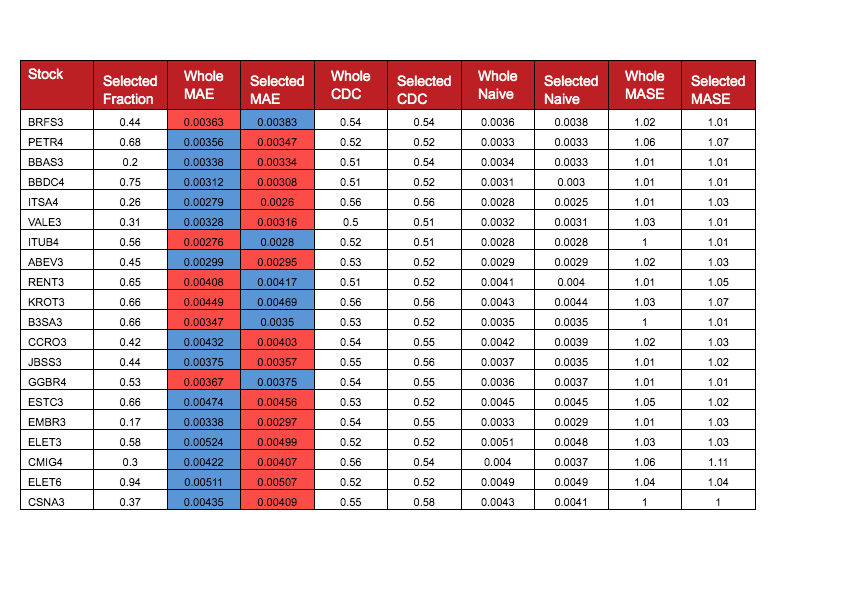

In [15]:
benchtable(rfbench)

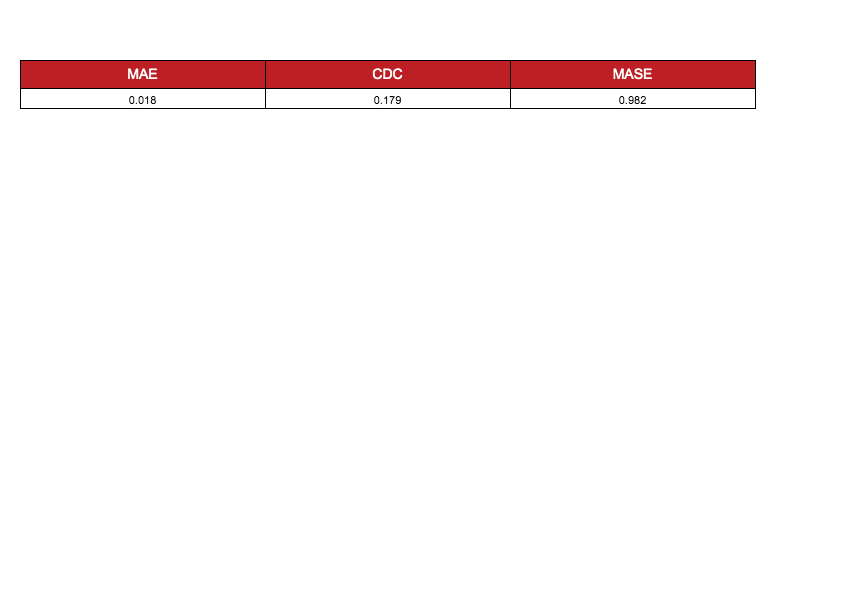

In [27]:
totable(crawlertests(rfbench), digits=3)

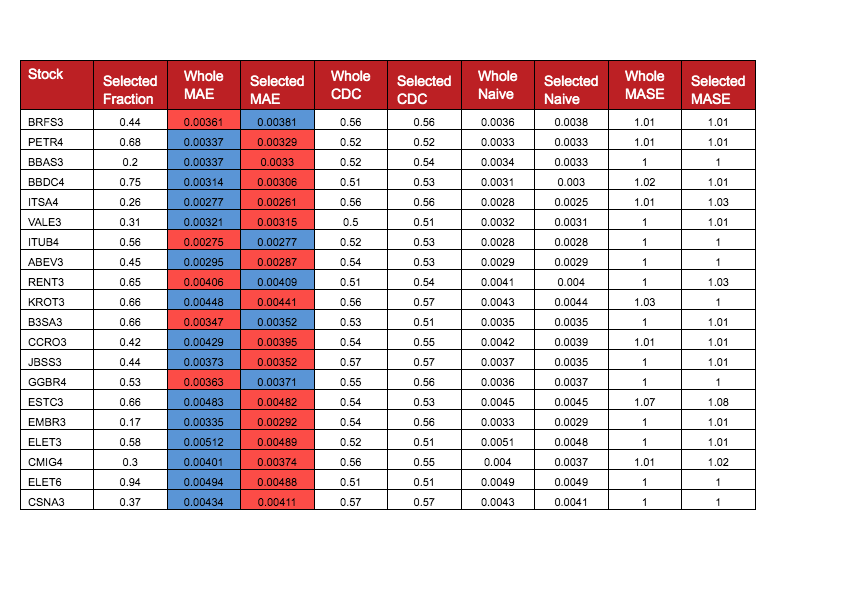

In [17]:
benchtable(lassobench)

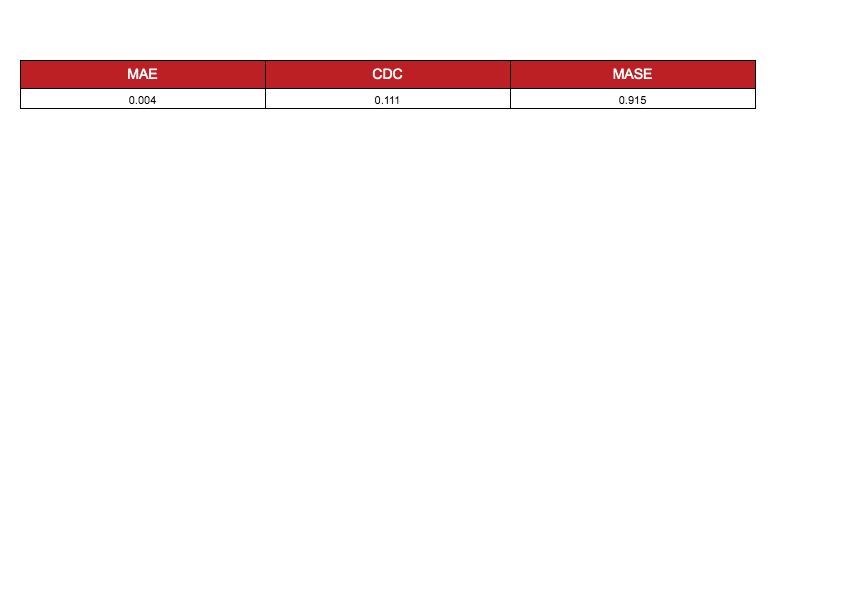

In [26]:
totable(crawlertests(lassobench), digits=3)

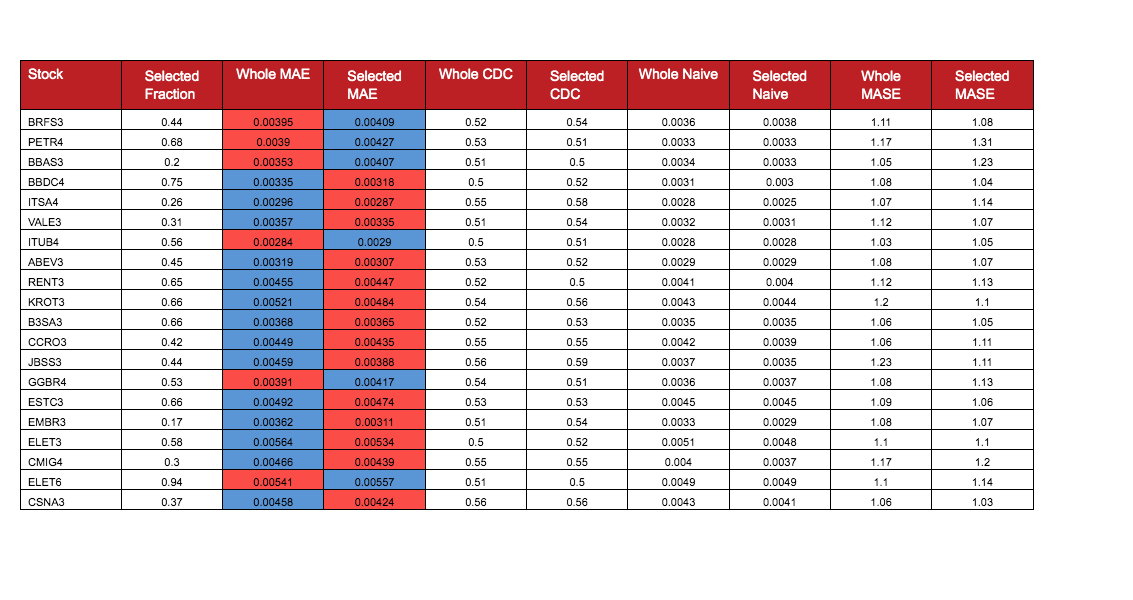

In [26]:
benchtable(boostbench)

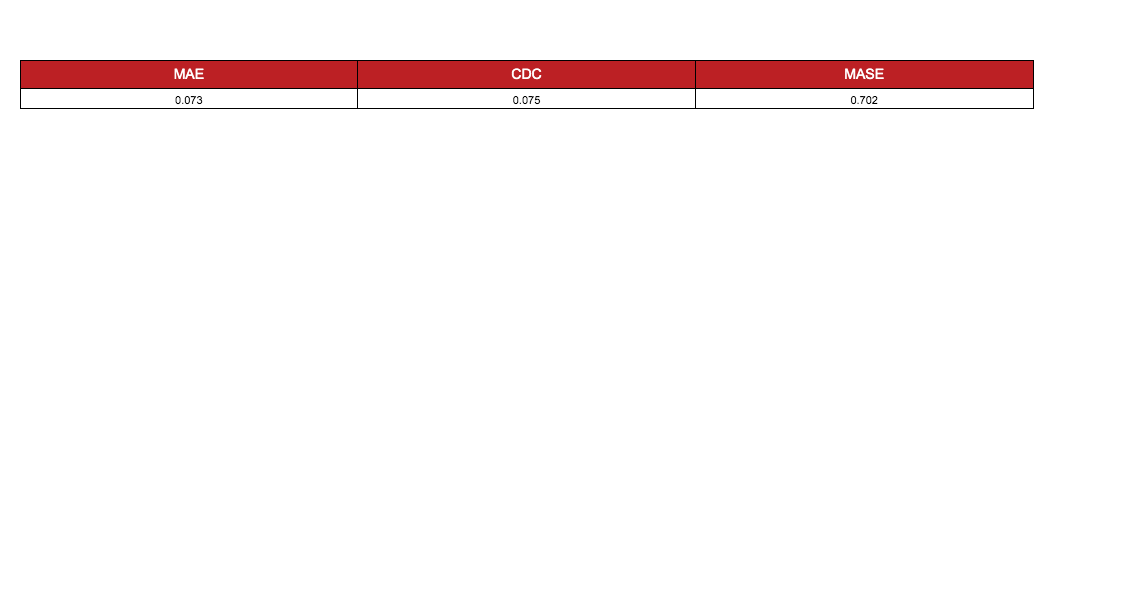

In [27]:
totable(crawlertests(boostbench), digits=3)

In [116]:
using GLM

function maerelplot(benchdf)
    coefv = coef(lm(@formula(SelectedMAE ~ WholeMAE), benchdf))
    x= min(benchdf.WholeMAE...):0.0001:max(benchdf.WholeMAE...)
    y = x*coefv[2] .+ coefv[1]
    angular = round(coefv[2], digits=2)
    trace = pty.scatter(x=benchdf.WholeMAE, y=benchdf.SelectedMAE, mode="markers", name="MAEs")
    line = pty.scatter(x=x, y=y, line_color="#FC4C47", name="Coef: $angular")
    pty.plot([trace, line], pty.Layout(margin=pty.attr(b=40,l=60),
             title="Relation Between Whole MAEs and Selected MAEs"))
end

maerelplot (generic function with 1 method)

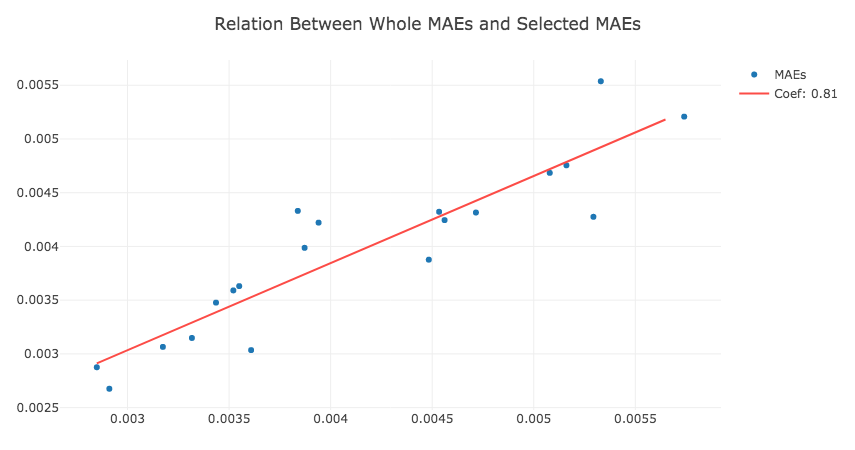

In [129]:
maerelplot(boostbench)

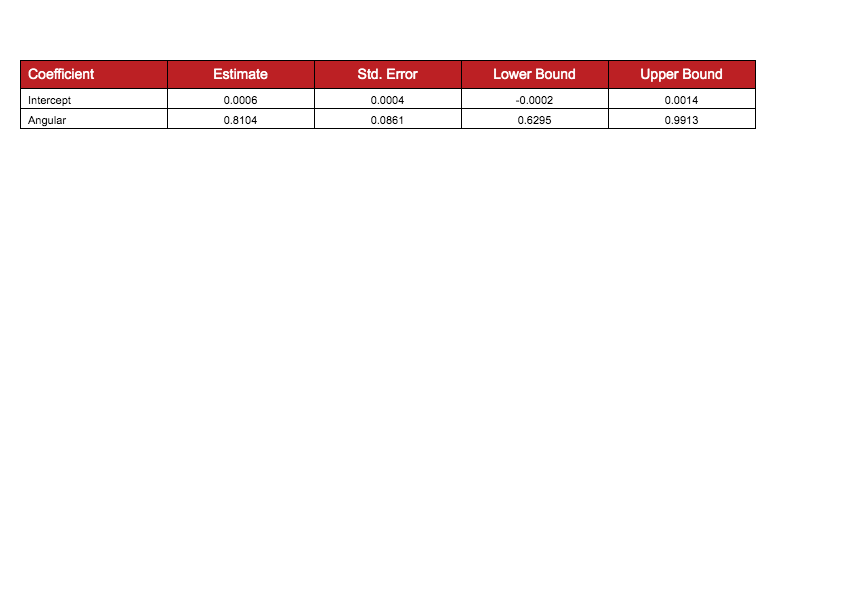

In [110]:
lmtable(lm(@formula(SelectedMAE ~ WholeMAE), boostbench))

In [4]:
paper = papers[1]
x, y, control, signal, xt, yt, controlt, signalout = loadfullpaperdata(paper, "boostpso");
model1 = boostgrid(x, y, nr_rounds=10)
xp, yp = selectsig(x, y, signal)
model2 = boostgrid(xp, yp , nr_rounds=10)
crossmase(x, y, model1)[2], crossmase(xp, yp, model2)[2]

(1.1520154835141556, 1.0833902760914353)

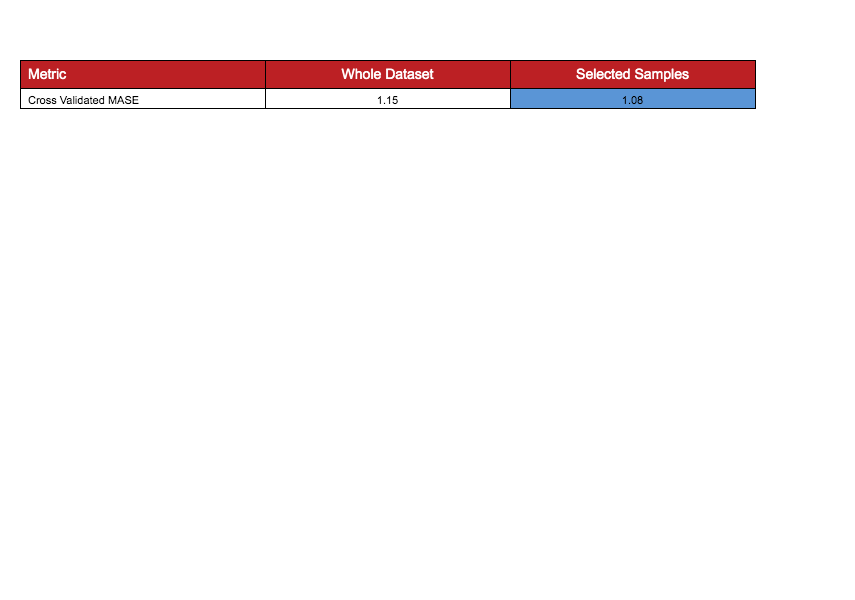

In [135]:
#masebrfs3boosttable
names = ["Metric" "Whole Dataset" "Selected Samples"]
rows = [
    "Cross Validated MASE"  1.15 1.08 
]
colors = fill("white", size([names; rows]))
colors[1, 3] =  pc.Utils.bestc
printtable(names, rows, colors)

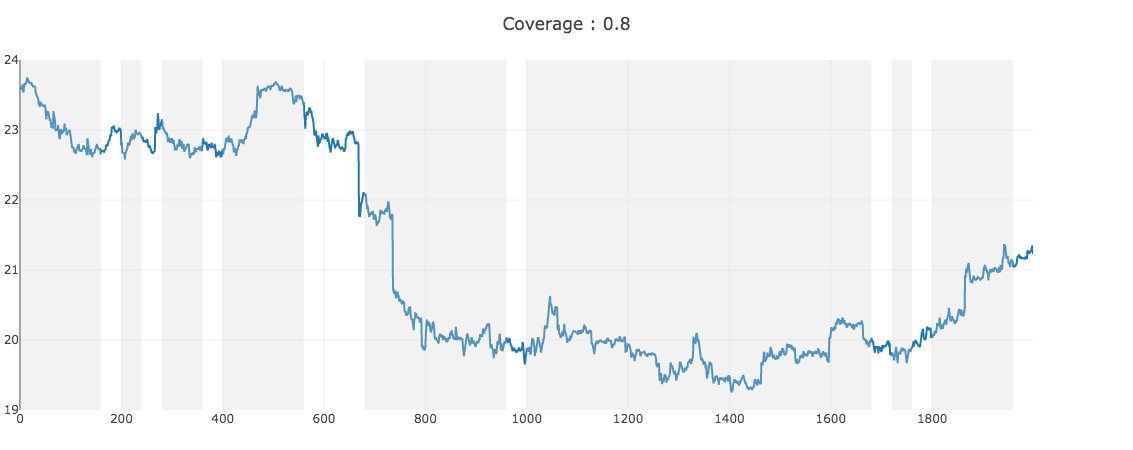

In [5]:
paper = papers[1]
x, y, control, signal, xt, yt, controlt, signalout = loadfullpaperdata(paper, "boostpso");
plotprevisibility(control.lastPrice, signal)

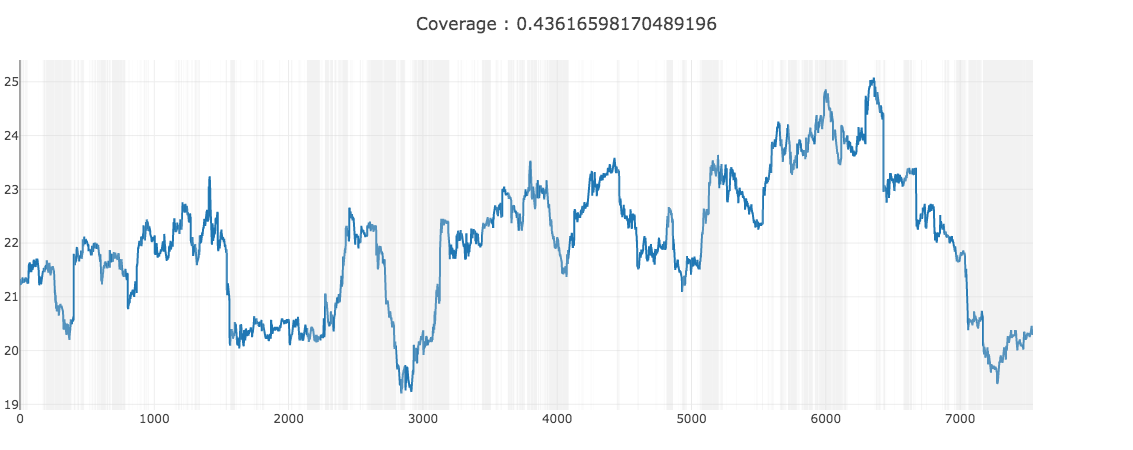

In [6]:
plotprevisibility(controlt.lastPrice, signalout)

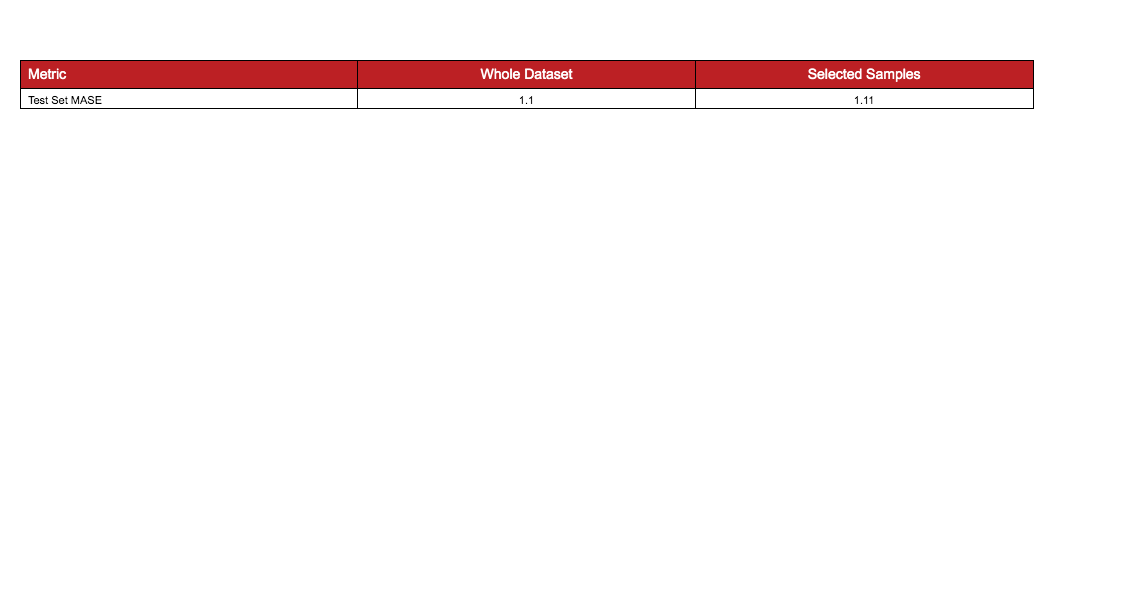

In [8]:
#masebrfs3boosttesttable
names = ["Metric" "Whole Dataset" "Selected Samples"]
rows = [
    "Test Set MASE"  1.1 1.11 
]
colors = fill("white", size([names; rows]))
# colors[1, 3] =  pc.Utils.bestc
printtable(names, rows, colors)

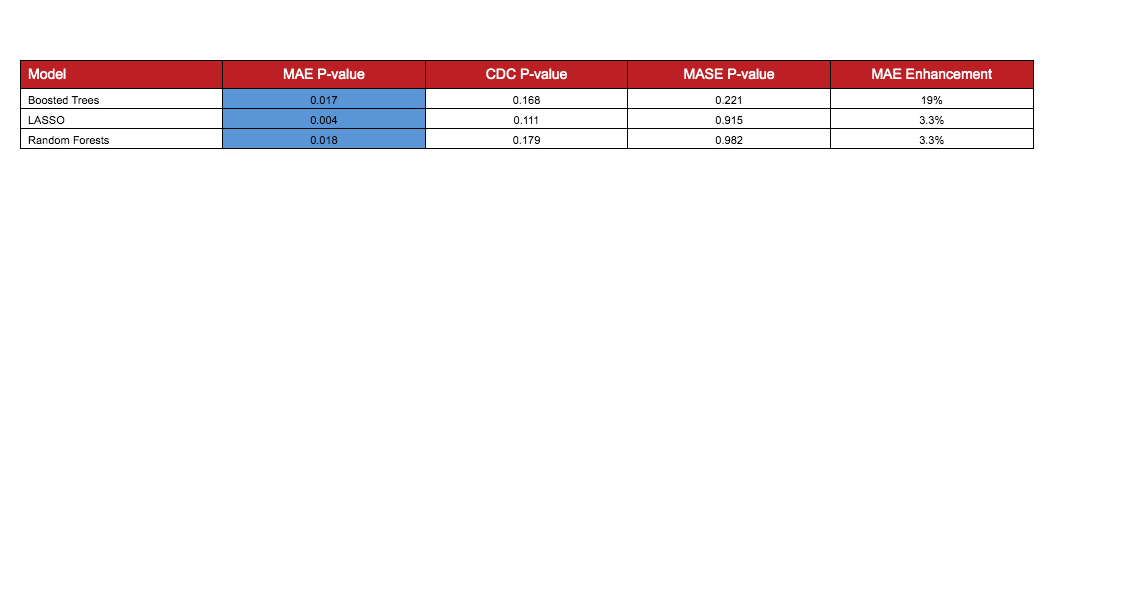

In [57]:
#masebrfs3boosttesttable
names = ["Model" "MAE P-value" "CDC P-value" "MASE P-value" "MAE Enhancement"]
rows = [
    "Boosted Trees"  0.017 0.168 0.221 "19%"
    "LASSO"  0.004 0.111 0.915 "3.3%"
    "Random Forests"  0.018 0.179 0.982 "3.3%" 

]
colors = fill("white", size([names; rows]))
colors[1:3, 2] =  fill(pc.Utils.bestc, 3)
printtable(names, rows, colors)

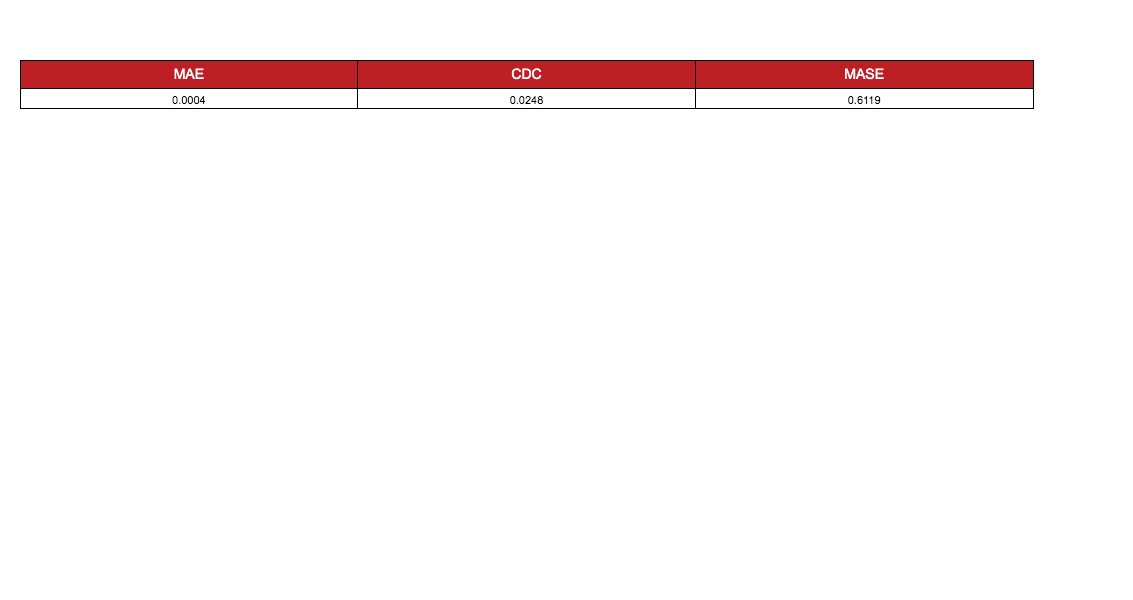

In [54]:
over = [rfbench; boostbench; lassobench]
colors = [pc.Utils.bestc, pc.Utils.bestc, "white"]
totable(crawlertests(over), digits=4)

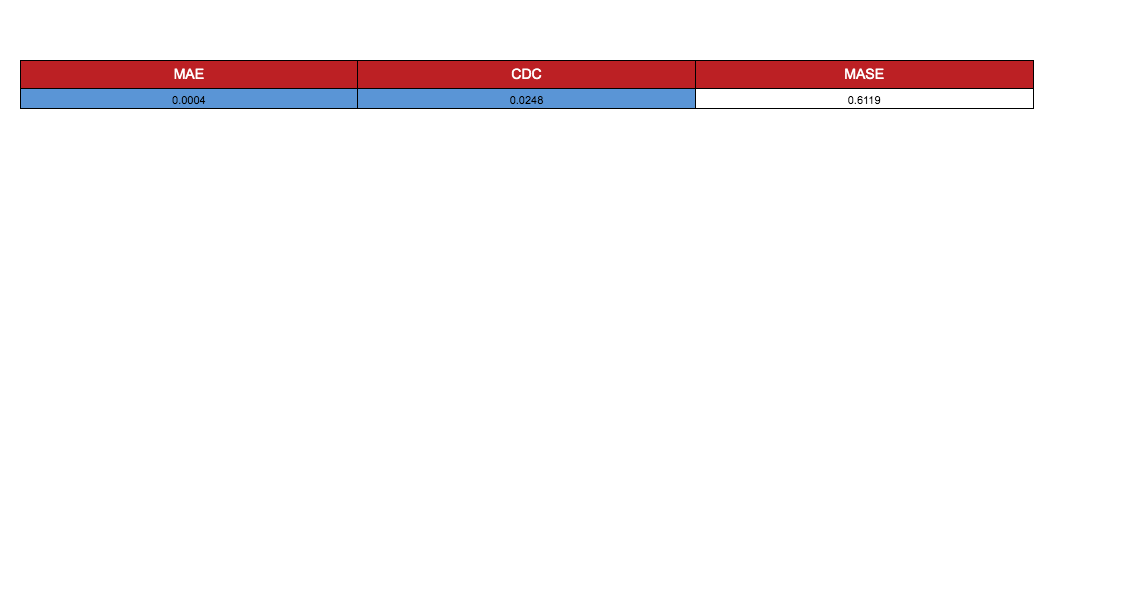

In [56]:
#masebrfs3boosttesttable
names = ["MAE" "CDC" "MASE" ]
rows = [
    0.0004 0.0248  0.6119
]
colors = fill("white", size([names; rows]))
colors[1, 1:2] =  fill(pc.Utils.bestc, 2)
printtable(names, rows, colors, align=false)